In [1]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("Downloads/Working Files/AB_NYC_2019.csv")
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [21]:
print(f"{data.isnull().sum()} \n{data.notnull().sum()}")

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64 
id                                48895
name                              48879
host_id                           48895
host_name                         48874
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                 

<span style="color: white; background-color: black; font-size: 15px;"> 
    Replace Nulls in name and hostname with 'Unknown'
</span>

In [27]:
data['name'] = data['name'].fillna('Unknown')
data['host_name'] = data['host_name'].fillna('Unknown')

In [30]:
data['name'].isnull().sum()
data['host_name'].isnull().sum()

np.int64(0)

In [31]:
data.duplicated().sum()

np.int64(0)

<span style="color: white; background-color: black; font-size: 15px;"> 
    Replace Nulls in Reviews pm with a calculation of the valie in number of reviews
</span>

In [38]:
data.loc[data['reviews_per_month'].isnull(), 'reviews_per_month'] = data['number_of_reviews'] / 12
data['reviews_per_month'].isnull().sum()

np.int64(0)

In [39]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [44]:
data.describe().round(2)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,4.889500e+04,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00
mean,19017143.24,6.762001e+07,40.73,-73.95,152.72,7.03,23.27,1.09,7.14,112.78
std,10983108.39,7.861097e+07,0.05,0.05,240.15,20.51,44.55,1.60,32.95,131.62
min,2539.00,2.438000e+03,40.50,-74.24,0.00,1.00,0.00,0.00,1.00,0.00
25%,9471945.00,7.822033e+06,40.69,-73.98,69.00,1.00,1.00,0.04,1.00,0.00
50%,19677284.00,3.079382e+07,40.72,-73.96,106.00,3.00,5.00,0.37,1.00,45.00
75%,29152178.50,1.074344e+08,40.76,-73.94,175.00,5.00,24.00,1.58,2.00,227.00
max,36487245.00,2.743213e+08,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


# Checking for Outliers

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

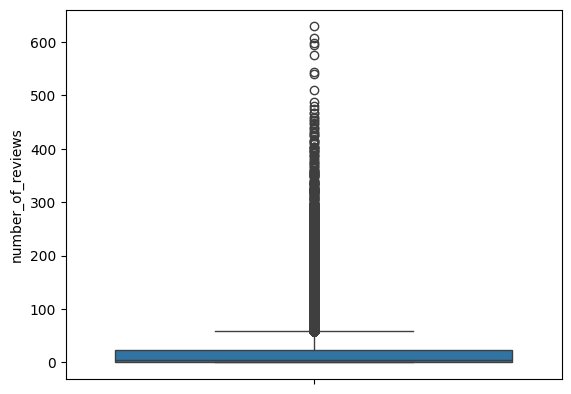

In [53]:
sns.boxplot(data['number_of_reviews'])
plt.show()

<Axes: ylabel='minimum_nights'>

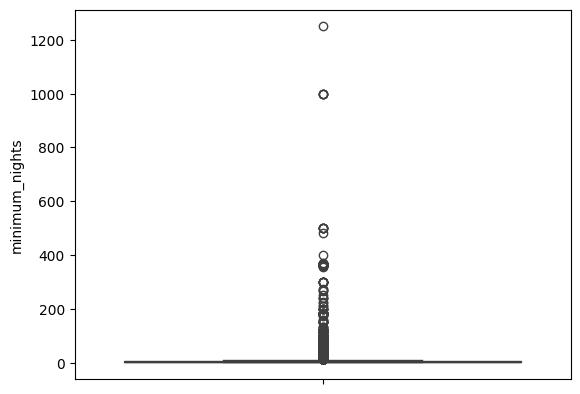

In [55]:
sns.boxplot(data['minimum_nights'])

In [65]:
data.loc[data['minimum_nights']>=1000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,Unknown,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN,0.00,1,362
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73293,-73.99782,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365


### Concerns
- The first property doesn't havea name. Might be a data collection error
- There is a lack of reviews. For proteries with this much bookings, reviews should be high


<Axes: ylabel='calculated_host_listings_count'>

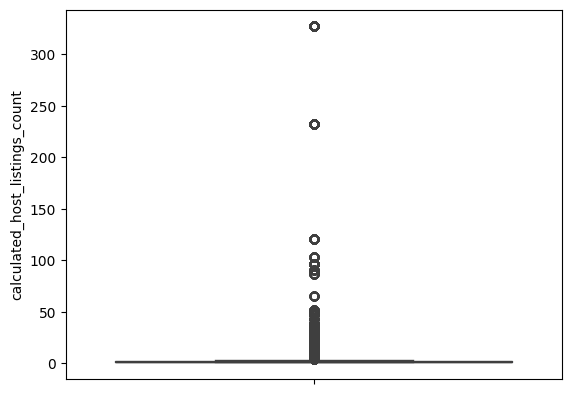

In [66]:
sns.boxplot(data['calculated_host_listings_count'])

In [73]:
outlier_owners = list(data['host_name'].loc[data['calculated_host_listings_count'] >= 200].unique())
outlier_owners

['Blueground', 'Sonder (NYC)']

In [75]:
data.loc[data['calculated_host_listings_count'] >= 200]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26137,20845031,"Homey Midtown East 1BR w/ Gym, Doorman, near t...",107434423,Blueground,Manhattan,Kips Bay,40.74510,-73.97915,Entire home/apt,308,30,0,NaN,0.00,232,156
29128,22370388,"Calming FiDi 1BR w/ lux Gym, Speakeasy + Doorm...",107434423,Blueground,Manhattan,Financial District,40.70637,-74.00941,Entire home/apt,271,30,1,2018-08-17,0.09,232,310
30158,23264421,"Mod Midtown East 1BR w/ Gym, walk to Grand Cen...",107434423,Blueground,Manhattan,Murray Hill,40.74900,-73.97961,Entire home/apt,289,30,0,NaN,0.00,232,223
30428,23538486,"Posh Park Avenue 1BR w/ Gym, Doorman in Midtow...",107434423,Blueground,Manhattan,Murray Hill,40.74891,-73.97887,Entire home/apt,305,30,1,2019-01-15,0.17,232,326
31506,24535218,"Luxury Tribeca 1BR w/ Gym, Doorman + Roof deck...",107434423,Blueground,Manhattan,Tribeca,40.71433,-74.01073,Entire home/apt,323,30,0,NaN,0.00,232,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,30,0,NaN,0.00,232,325
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,30,0,NaN,0.00,232,338
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,30,0,NaN,0.00,232,228
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,30,0,NaN,0.00,232,188


In [86]:
count = data['name'].value_counts()
data_filtered = data[data['name'].isin(count[count > 10].index)]
data_filtered

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
668,253466,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73693,-73.95284,Entire home/apt,199,3,33,2019-06-24,0.47,28,60
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,2018-11-06,0.32,28,84
670,253475,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73794,-73.95254,Entire home/apt,199,3,59,2019-06-24,0.66,28,60
675,253803,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73708,-73.95271,Entire home/apt,199,3,23,2019-06-22,0.26,28,60
676,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73652,-73.95236,Entire home/apt,199,3,43,2019-07-02,0.47,28,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42273,32813805,Private Room,246849103,Kathleen,Brooklyn,Sunset Park,40.66061,-73.99765,Private room,40,1,5,2019-04-07,1.35,1,89
44849,34422726,Home away from home,234422924,Arlene,Bronx,City Island,40.84390,-73.78792,Private room,29,1,2,2019-06-16,1.43,1,18
44878,34446664,Home away from home,260038086,Kimberly,Queens,Laurelton,40.66880,-73.74384,Entire home/apt,254,3,2,2019-06-03,1.46,1,24
47714,35876721,Home away from home,269840781,Rosemary,Queens,Maspeth,40.71673,-73.90009,Private room,140,1,0,NaN,0.00,1,88


# Concerns
- Some of the properties are duplicated - this probably refers to differnt units in the same properties because the coordinates differ
- this might affect the calculations in some instances - it is importance to keep this in mind!